In [6]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt

Play Audio

In [7]:
filename = "D:/Ngoding/darbukaToneClassification/static/dataset/tonePattern/baladi2_10.wav"
ipd.Audio(filename)

Get Audio Information

In [8]:
sample_rate, samples = wavfile.read(filename)
print("Sample rate: {0} Hz".format(sample_rate))
print("Samples : {0}".format(len(samples)))
print("Audio duration: {0} second".format(len(samples) / sample_rate))

Sample rate: 44100 Hz
Samples : 190747
Audio duration: 4.325328798185941 second


In [9]:
import librosa
import librosa.feature

audio,_ = librosa.load(filename, sample_rate)
windowLength = int(0.02*sample_rate)
frameLength = int(0.01*sample_rate)
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13, n_fft=windowLength, hop_length=frameLength)
mfcc_flat = np.mean(mfcc, axis=1)
print(mfcc_flat)

[-294.7823     141.39618      9.754214    16.332249    12.102022
    4.236673     7.363597    12.000538     5.170306     5.0573664
    6.0936427    2.8731432   -2.327497 ]


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_10664/822659908.py:4: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio,_ = librosa.load(filename, sample_rate)


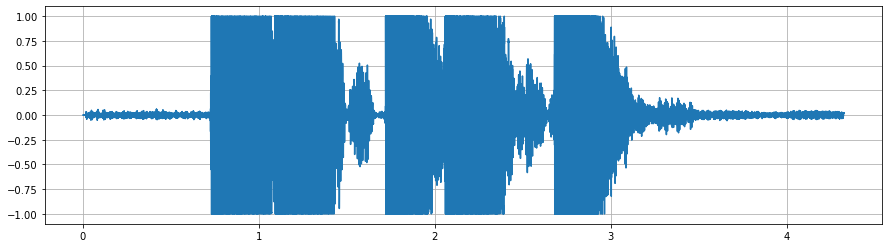

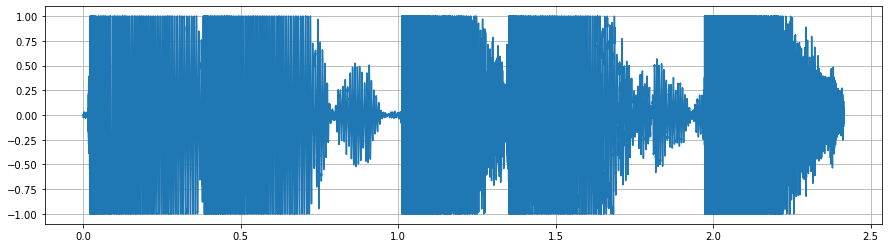

In [10]:
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audioTrim,_ = librosa.effects.trim(audio, top_db=20)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audioTrim) / sample_rate, num=len(audioTrim)), audioTrim)
plt.grid(True)

Cut Audio

In [11]:
from pydub import AudioSegment

newAudio = AudioSegment.from_wav(filename)
newAudio = newAudio[1000:2000]
# newAudio.export('newSong.wav', format="wav")

AttributeError: 'numpy.ndarray' object has no attribute 'export'

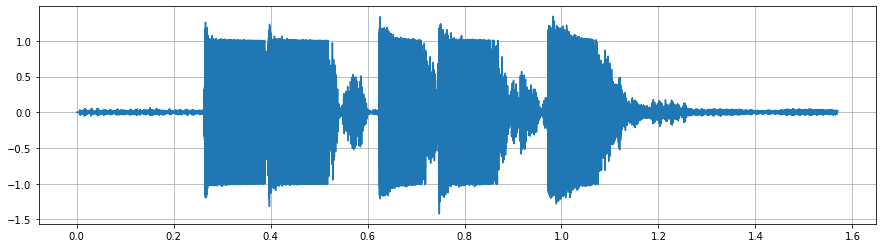

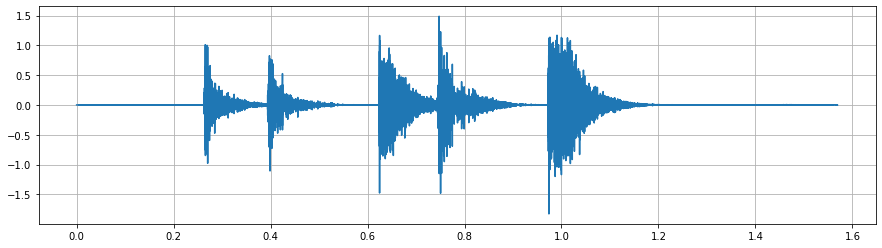

In [15]:
import librosa.display
from scipy import signal
from IPython.display import Audio, IFrame, display

audio,sr = librosa.load(filename, mono=True, sr=16000, offset=0, duration=10)

def f_high(y,sr):
  b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
  yf = signal.lfilter(b,a,y)
  return yf

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audio = f_high(audio, sr)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

# display(Audio(audio,rate=sr))
# audio.export('file.wav', format="wav")